In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Convert the datatype of column- rate

In [9]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)
df['rate'] = df['rate'].apply(handleRate)


In [10]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [11]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## What type of restaurant do the majority of customers order from?

In [13]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of restaurent')

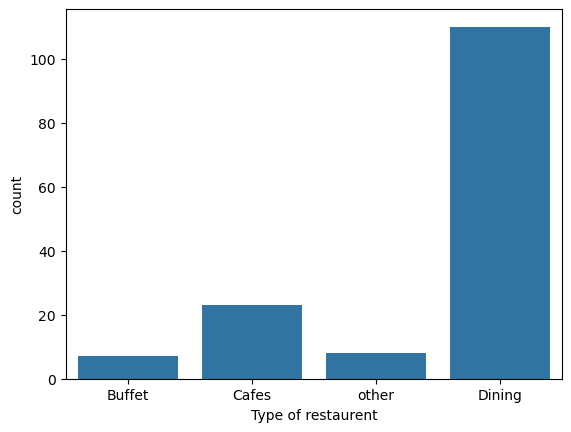

In [17]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurent")

## How many votes has each type of restaurant received from customers?

In [ ]:
# Using Line Graph

Text(0, 0.5, 'votes')

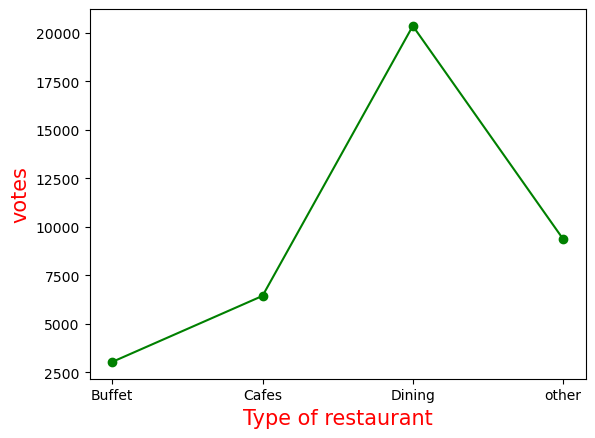

In [22]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})  
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=15)
plt.ylabel("votes", c="red", size=15)


## What are the ratings that the majority of restaurants have received?

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


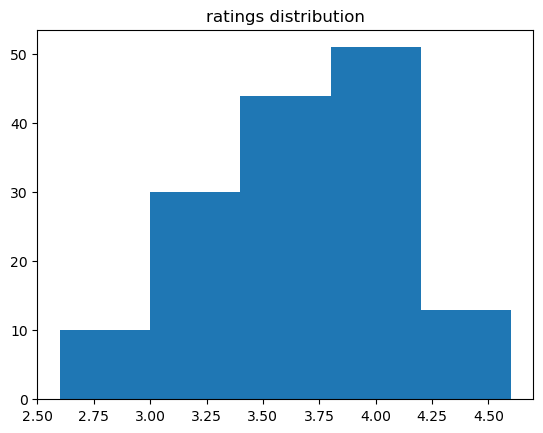

In [25]:
plt.hist(df['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

## Zomato has observed that most couples order most of their food online. What is their average spending on each order?

#### Average order spending by couples

In [27]:
df.head(3)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

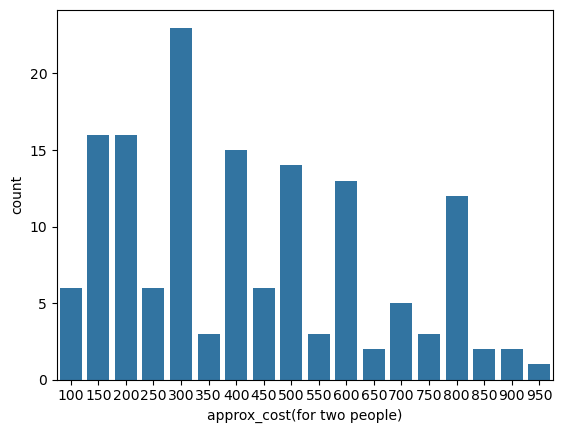

In [28]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

## Which mode(online or offline) has received the maximum ratings?

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

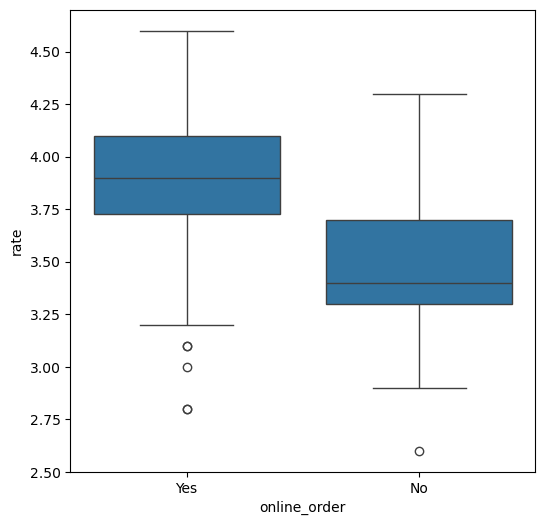

In [31]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order',y = 'rate', data = df)

## Which type of restaurant received more offline orders, so that Zomato can propose customers with some good offers?

In [ ]:
# Using heat plot

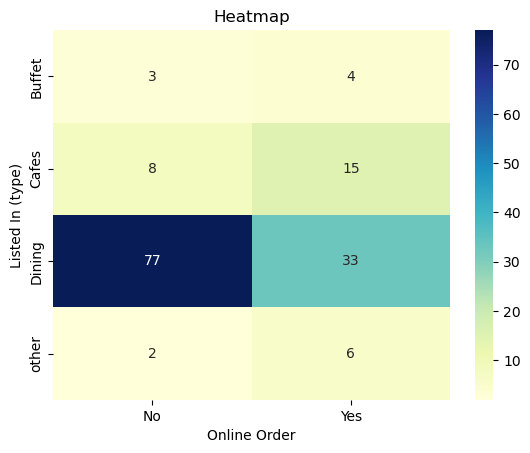

In [34]:
pivot_table = df.pivot_table(index = 'listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt = 'd')  #YellowGreenBlue
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (type)")
plt.show()


 ## Conclusion:

1.	Majority of the restaurant falls in dining category.
2.	Dining restaurants has received maximum votes.
3.	Majority restaurants received ratings from 3.5- 4
4.	The majority of couples prefer restaurants with an approximate cost of 300rs.
5.	Offline received lower ratings as compared to online orders as online ratings are more than offline ratings seen in boxplot.
6.	Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer orders in          person at restaurants, but prefer online ordering at cafes.
